# **Кейс на продуктового аналитика Т-Банка. EDA**

В данном файле приведен разведочный анализ данных из датасета **"Т-Банк: поездки на самокатах"**

In [298]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [299]:
df=pd.read_csv('kicksharing.csv')

# **Структура и характеристика данных**

In [300]:
df.shape

(396749, 20)

В данном датасете 396749 строк и 20 столбцов

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

1. Столбцы order_rk, party_rk, age, book_time_zone_cd - числовые целочисленные
2. Столбцы activation_cost, minute_cost, hold_amount, distance_km, nominal_price_rub_amt, loyalty_accrual_rub_amt, loyalty_accrual_bns_amt - числовые непрерывные
3. Столбцы gender_cd (бинарный), education_level_cd (порядковый), marital_status_cd, lvn_state_nm, transport_model, created_dttm, book_start_dttm, book_end_dttm, local_book_start_dttm - категориальные

In [302]:
df.describe(include='all')

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
count,3.967490e+05,3.967490e+05,393828,396749.000000,190059,217729,362572,396749.000000,396749.000000,396749.000000,396749,396749.000000,396749,396749,396749,396749.000000,396749,396749.000000,366992.000000,21948.000000
unique,NaN,NaN,2,NaN,5,5,212,NaN,NaN,NaN,14,NaN,387224,396745,396749,NaN,396746,NaN,NaN,NaN
top,NaN,NaN,M,NaN,GRD,UNM,Г МОСКВА,NaN,NaN,NaN,SL,NaN,2024-09-12 15:15:50.000000,2024-09-17 13:44:24.183000,2024-08-07 10:07:59.339524,NaN,2024-09-17 13:44:24.183000,NaN,NaN,NaN
freq,NaN,NaN,335458,NaN,94341,116094,90897,NaN,NaN,NaN,241247,NaN,4,2,1,NaN,2,NaN,NaN,NaN
mean,2.892236e+08,5.988426e+08,NaN,31.544006,NaN,NaN,NaN,7.288688,42.593226,299.983869,NaN,3.681031,NaN,NaN,NaN,3.536155,NaN,127.647694,37.516121,127.789319
std,3.813458e+07,3.311675e+08,NaN,9.434545,NaN,NaN,NaN,1.289492,11.989974,1.939153,NaN,141.862349,NaN,NaN,NaN,1.209075,NaN,100.122365,75.208560,496.812143
min,2.526112e+08,1.471700e+04,NaN,12.000000,NaN,NaN,NaN,1.500000,0.000000,80.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,-161.940000,1.000000
25%,2.618150e+08,2.962323e+08,NaN,24.000000,NaN,NaN,NaN,6.490000,30.000000,300.000000,NaN,0.941054,NaN,NaN,NaN,3.000000,NaN,80.840000,11.240000,43.000000
50%,2.704367e+08,6.110092e+08,NaN,31.000000,NaN,NaN,NaN,7.490000,50.000000,300.000000,NaN,1.729883,NaN,NaN,NaN,3.000000,NaN,103.940000,18.730000,62.000000
75%,3.432678e+08,8.646921e+08,NaN,37.000000,NaN,NaN,NaN,8.220000,50.000000,300.000000,NaN,3.063694,NaN,NaN,NaN,3.000000,NaN,142.100000,35.060000,81.000000


**Описание ЦА**
1. Средняя и медиана возраста около 31 (до очистки от выбросов), третий квартиль также не очень далеко от этого значения - 37 - у сервиса молодая аудитория (в основном в возрасте от 24 до 37)
2. Чаще всего пользователями сервиса явлются люди, которые имеют высшее образование и/или холосты и/или живут в Москве
3. Большинство клиентов из европейской части России, судя по 3 квартилю временной зоны

**Описание поездок**
1. Стоимость минуты имеет небольшое стандартное отклонение, значит она примерно находится у одного значения
2. Самая популярна модель транспорта SL
3. Чаще всего стоимость поездок не превосходит 150 у.е., а длина поездки 3 км

**Матрица корреляций**

In [303]:
df.iloc[:, 2:].corr(numeric_only=True) 

,age,minute_cost,activation_cost,hold_amount,distance_km,book_time_zone_cd,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
age,1.000000,0.062766,0.072271,-0.000606,0.001315,-0.078265,0.054268,0.023551,-0.000700
minute_cost,0.062766,1.000000,0.421931,0.028370,0.000978,-0.330214,0.170514,0.104838,0.027845
activation_cost,0.072271,0.421931,1.000000,0.013746,0.000591,-0.474094,0.144487,0.064258,0.031168
hold_amount,-0.000606,0.028370,0.013746,1.000000,0.000215,0.003474,0.006447,0.000518,0.000826
distance_km,0.001315,0.000978,0.000591,0.000215,1.000000,-0.003100,0.020728,0.014564,0.053726
book_time_zone_cd,-0.078265,-0.330214,-0.474094,0.003474,-0.003100,1.000000,-0.069111,-0.022318,0.008887
nominal_price_rub_amt,0.054268,0.170514,0.144487,0.006447,0.020728,-0.069111,1.000000,0.690503,0.294205
loyalty_accrual_rub_amt,0.023551,0.104838,0.064258,0.000518,0.014564,-0.022318,0.690503,1.000000,0.696930
loyalty_accrual_bns_amt,-0.000700,0.027845,0.031168,0.000826,0.053726,0.008887,0.294205,0.696930,1.000000


1. Можно заметить отрицательную корреляию между стоимостью минуты поездки и суммой взноса, однако они также отрицательно коррелириуют с временной зоной, видимо, чем восточнее регион, тем ниже тарифы
2. Кэшбеки коррелириует с номинальной суммой покупки, а также между собой, значит за каждую покупку выплачивают примерно в одной попорции кэшбек в рублях и бонусах
3. Количество проеханных километров не коррелирует с ценой минуты, то есть пользователи не образщают на это внимания, определяя сколько проехать на самокате

In [304]:
print(f'В датасете всего {df.isna().sum().sum()} пропусков')

В датасете всего 827366 пропусков


In [305]:
df.isna().sum()

order_rk                        0
party_rk                        0
gender_cd                    2921
age                             0
education_level_cd         206690
marital_status_cd          179020
lvn_state_nm                34177
minute_cost                     0
activation_cost                 0
hold_amount                     0
transport_model                 0
distance_km                     0
created_dttm                    0
book_start_dttm                 0
book_end_dttm                   0
book_time_zone_cd               0
local_book_start_dttm           0
nominal_price_rub_amt           0
loyalty_accrual_rub_amt     29757
loyalty_accrual_bns_amt    374801
dtype: int64

В датасете есть пропуски в столбцах гендер (около 1%), уровень образования (более 50% - просто заполнить пропущенный значения мцт не получится), семейный статус (тоже около 50% пропусков, заменить пропуски не получится), регион (около 10%), размер выплаченного кэшбека в рублях и бонусах, вероятно, пропуски в этих двух столбцах сигнализируют об отсутствии выплат кэшбека за поездку.

In [306]:
#заменю пропуски в gender_cd и lvn_state_nm на моду
df['gender_cd']=df['gender_cd'].fillna(df['gender_cd'].mode()[0])
df['lvn_state_nm']=df['lvn_state_nm'].fillna(df['lvn_state_nm'].mode()[0])

#заменю пропуски в loyalty_accrual_rub_amt и loyalty_accrual_bns_amt на 0 в соответсвии с моим предположением
df['loyalty_accrual_bns_amt']=df['loyalty_accrual_bns_amt'].fillna(0)
df['loyalty_accrual_rub_amt']=df['loyalty_accrual_rub_amt'].fillna(0)

In [307]:
for i in ['age', 'distance_km', 'nominal_price_rub_amt']: #удаляю выбросы по столбцам, 
    iqr = df[i].quantile(0.75)-df[i].quantile(0.25)       #где максимальное значение сильно отличается от третьего квантиля
    bt = df[i].quantile(0.25)-1.5*iqr
    top = df[i].quantile(0.75)+1.5*iqr
    df=df[(df[i]>=bt)&(df[i]<=top)]

for i in ['loyalty_accrual_rub_amt', 'loyalty_accrual_bns_amt']:
    iqr = df[df[i]>0][i].quantile(0.75)-df[i].quantile(0.25)       #где максимальное значение сильно отличается от третьего квантиля
    bt = df[df[i]>0][i].quantile(0.25)-1.5*iqr
    top = df[df[i]>0][i].quantile(0.75)+1.5*iqr
    df=df[((df[i]>=bt)&(df[i]<=top))|(df[i]==0)] #ограничиваю выбросы так, чтобы, если выплаты бонусов и были, то они бы были в нормальных границах, но если их вообще не было, объект не удалялся

In [308]:
print(f'В датасете осталось {df.shape[0]} строк и {df.shape[1]} столбцов.') #хотя столбцы образования и семейного положения можно было бы удалить из-за большой доли выбросов, 
                                                                            # я их оставлю, воспринимая данные как репрезентативную выборку, по которой буду делать предположения о всех клиентах

В датасете осталось 305416 строк и 20 столбцов.


# **Визуализация данных**

**Визуализация ЦА**

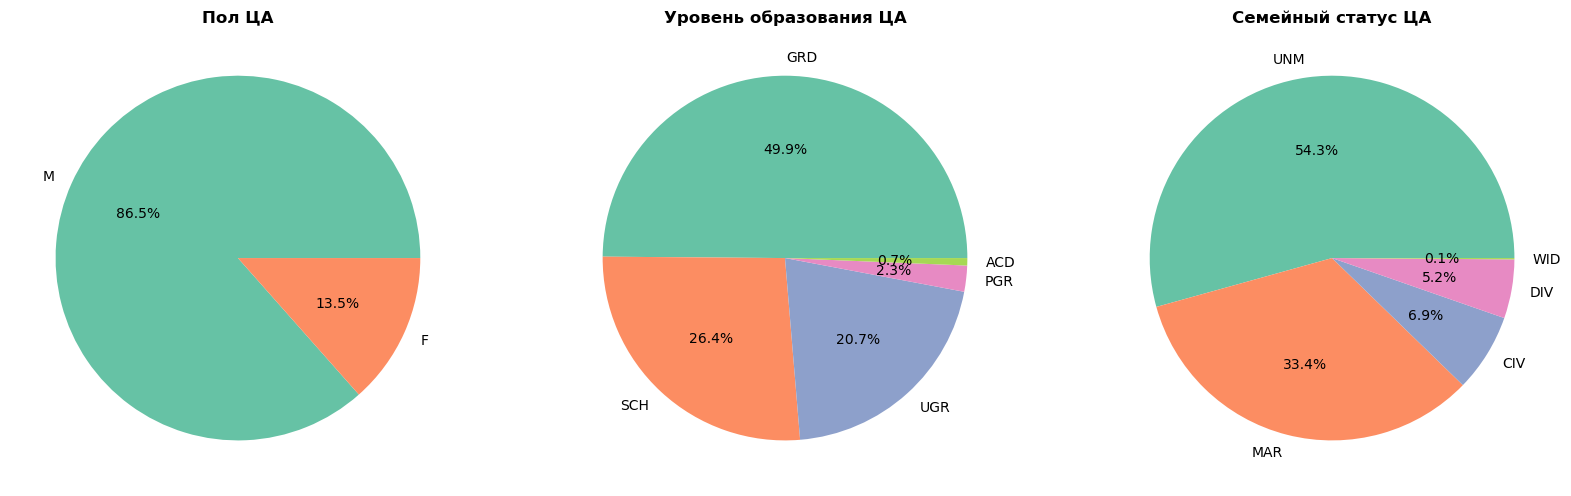

In [309]:
fig, axs = plt.subplots(1, 3, figsize = (20,10))

axs[0].set_title('Пол ЦА', fontweight='bold')
axs[0].pie(df['gender_cd'].value_counts(), labels=df['gender_cd'].value_counts().index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))

axs[1].set_title('Уровень образования ЦА', fontweight='bold')
axs[1].pie(df['education_level_cd'].value_counts(), labels=df['education_level_cd'].value_counts().index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))

axs[2].set_title('Семейный статус ЦА', fontweight='bold')
axs[2].pie(df['marital_status_cd'].value_counts(), labels=df['marital_status_cd'].value_counts().index, autopct='%1.1f%%', colors=sns.color_palette('Set2'));

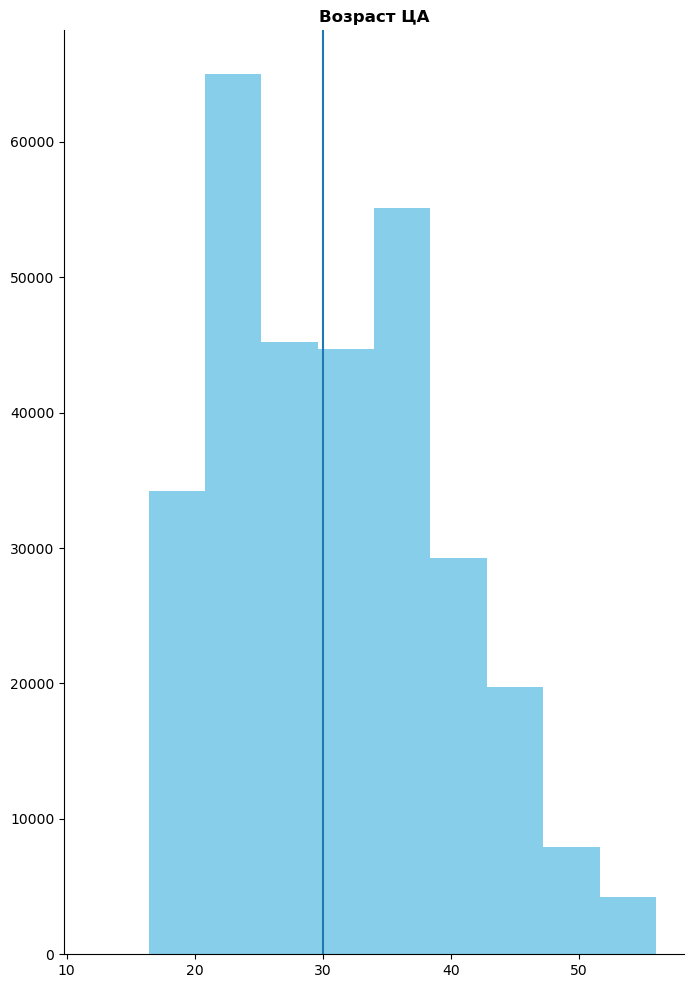

In [317]:
plt.figure(figsize=(8, 12))

plt.title('Возраст ЦА', fontweight='bold')
plt.hist(df['age'], color='skyblue')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(df['age'].median());

**Визуализация поездок**

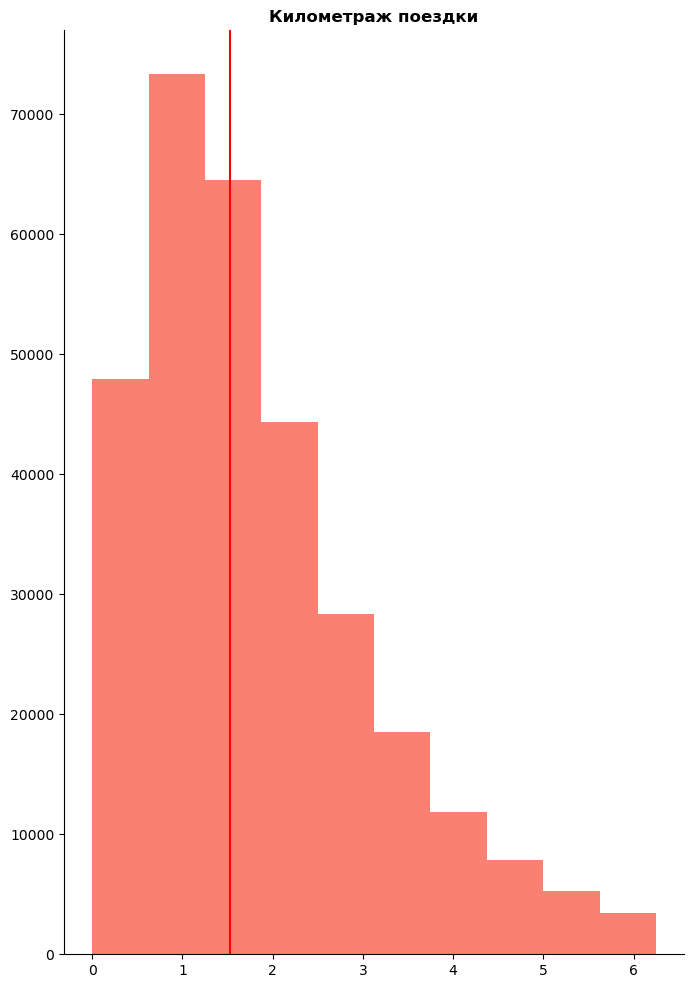

In [318]:
plt.figure(figsize=(8, 12))

plt.title('Километраж поездки', fontweight='bold')
plt.hist(df['distance_km'], color='salmon')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(df['distance_km'].median(), color='r');

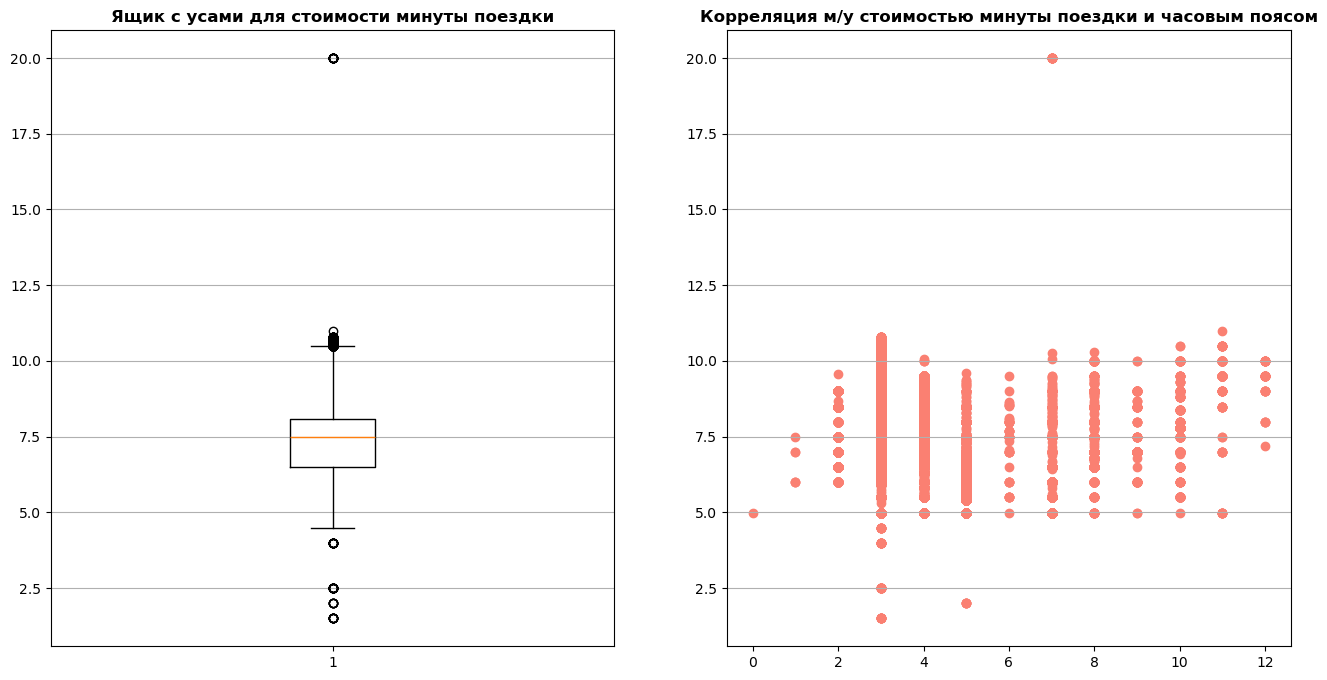

In [312]:
fig, axs = plt.subplots(1,2, figsize=(16,  8))

axs[0].set_title('Ящик с усами для стоимости минуты поездки', fontweight='bold')
axs[0].boxplot(df['minute_cost'])
axs[0].grid(axis='y')


axs[1].set_title('Корреляция м/у стоимостью минуты поездки и часовым поясом', fontweight='bold')
axs[1].scatter(df['book_time_zone_cd'], df['minute_cost'], color='salmon')
axs[1].grid(axis='y');